In [303]:
%matplotlib inline
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from __future__ import print_function

import pydotplus

from sklearn.grid_search import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from operator import itemgetter
from time import time
from scipy.stats import randint

import sklearn.metrics

In [304]:
def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
    
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

#funções auxiliares
#extraídas de http://chrisstrelioff.ws/sandbox/2015/06/25/decision_trees_in_python_again_cross_validation.html
#OBS. sugere-se a leitura do link para maiores informações sobre as funções.

def report(grid_scores, n_top=3):
    """Report top n_top parameters settings, default n_top=3.

    Args
    ----
    grid_scores -- output from grid or random search
    n_top -- how many to report, of top models

    Returns
    -------
    top_params -- [dict] top parameter settings found in
                  search
    """
    top_scores = sorted(grid_scores,
                        key=itemgetter(1),
                        reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print(("Mean validation score: "
               "{0:.3f} (std: {1:.3f})").format(
               score.mean_validation_score,
               np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

    return top_scores[0].parameters

def run_gridsearch(X, y, clf, param_grid, cv=5):
    """Run a grid search for best Decision Tree parameters.

    Args
    ----
    X -- features
    y -- targets (classes)
    cf -- scikit-learn Decision Tree
    param_grid -- [dict] parameter settings to test
    cv -- fold of cross-validation, default 5

    Returns
    -------
    top_params -- [dict] from report()
    """
    grid_search = GridSearchCV(clf,
                               param_grid=param_grid,
                               cv=cv)
    start = time()
    grid_search.fit(X, y)

    print(("\nGridSearchCV took {:.2f} "
           "seconds for {:d} candidate "
           "parameter settings.").format(time() - start,
                len(grid_search.grid_scores_)))

    top_params = report(grid_search.grid_scores_, 3)
    return  top_params

def run_randomsearch(X, y, clf, para_dist, cv=5,
                     n_iter_search=20):
    """Run a random search for best Decision Tree parameters.

    Args
    ----
    X -- features
    y -- targets (classes)
    cf -- scikit-learn Decision Tree
    param_dist -- [dict] list, distributions of parameters
                  to sample
    cv -- fold of cross-validation, default 5
    n_iter_search -- number of random parameter sets to try,
                     default 20.

    Returns
    -------
    top_params -- [dict] from report()
    """
    random_search = RandomizedSearchCV(clf,
                        param_distributions=param_dist,
                        n_iter=n_iter_search)

    start = time()
    random_search.fit(X, y)
    print(("\nRandomizedSearchCV took {:.2f} seconds "
           "for {:d} candidates parameter "
           "settings.").format((time() - start),
                               n_iter_search))

    top_params = report(random_search.grid_scores_, 3)
    return  top_params    

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

In [305]:
#https://www.kaggle.com/sachinkulkarni/titanic/an-interactive-data-science-tutorial
#carrega a base de dados
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
full_data = [train, test]

In [306]:
#identifica as características presentes
train.columns.values

#VARIABLE DESCRIPTIONS:
#We've got a sense of our variables, their class type, and the first few observations of each. We know we're working with 1309 observations of 12 variables. To make things a bit more explicit since a couple of the variable names aren't 100% illuminating, here's what we've got to deal with:
#Variable Description
#Survived: Survived (1) or died (0)
#Pclass: Passenger's class
#Name: Passenger's name
#Sex: Passenger's sex
#Age: Passenger's age
#SibSp: Number of siblings/spouses aboard
#Parch: Number of parents/children aboard
#Ticket: Ticket number
#Fare: Fare
#Cabin: Cabin
#Embarked: Port of embarkation

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [307]:
#cria a base para o projeto
full = train.append( test , ignore_index = True )
titanic = full[ :891 ]
print ('Datasets:' , 'full:' , full.shape , 'titanic:' , titanic.shape)

Datasets: full: (1309, 12) titanic: (891, 12)


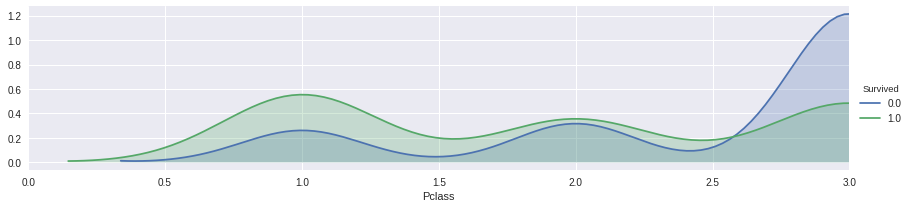

In [308]:
# Run the code to see the variables, then read the variable description below to understand them.
titanic.head()

plot_distribution(full, var='Pclass', target='Survived')

In [309]:
titanic.describe()
#é possível ver dados inconsistentes. Por exexmplo, idade mínima de 0.42?

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


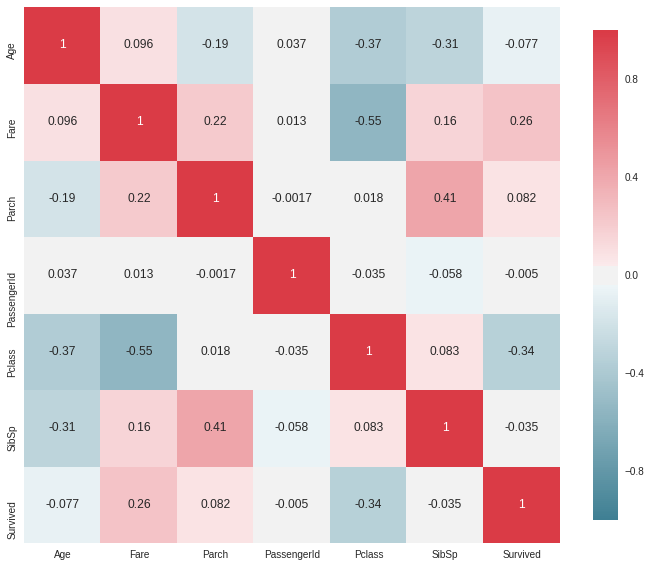

In [310]:
#correlação entre as características.
#pode dar uma ideia do que está relacionado com o que.
plot_correlation_map(titanic)

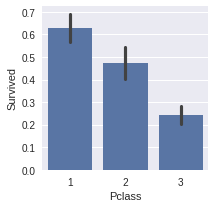

In [311]:
#Distribuição das amostras dentro de uma mesma classe
# Visualize a survival rate em relação a outros atributos: Embarked, Sex, Pclass, SibSp, Parch
plot_categories( titanic , cat = 'Pclass' , target = 'Survived' )

In [312]:
#A PARTIR DESTE PONTO SÃO CARREGADOS E PROCESSADOS OS ATRIBUTOS

In [313]:
# Transform Sex into binary values 0 and 1
sex = pd.Series( np.where( full.Sex == 'male' , 1 , 0 ) , name = 'Sex' )


In [314]:
# Create a new variable for every unique value of Embarked
embarked = pd.get_dummies( full.Embarked , prefix='Embarked' )
embarked.head()
# Create a new variable for every unique value of Embarked
pclass = pd.get_dummies( full.Pclass , prefix='Pclass' )
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [315]:
#Most machine learning alghorims require all variables to have values in order to use it for training the model. 
#The simplest method is to fill missing values with the average of the variable across all observations in the training set.

# Create dataset
imputed = pd.DataFrame()

# Fill missing values of Age with the average of Age (mean)
imputed[ 'Age' ] = full.Age.fillna( full.Age.mean() )

# Fill missing values of Fare with the average of Fare (mean)
imputed[ 'Fare' ] = full.Fare.fillna( full.Fare.mean() )

imputed.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [316]:
#Titles reflect social status and may predict survival probability

title = pd.DataFrame()
# we extract the title from each name
title[ 'Title' ] = full[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

# we map each title
title[ 'Title' ] = title.Title.map( Title_Dictionary )
title = pd.get_dummies( title.Title )
#title = pd.concat( [ title , titles_dummies ] , axis = 1 )

title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [317]:
# Extract Cabin category information from the Cabin number
cabin = pd.DataFrame()

# replacing missing cabins with U (for Uknown)
cabin[ 'Cabin' ] = full.Cabin.fillna( 'U' )

# mapping each Cabin value with the cabin letter
cabin[ 'Cabin' ] = cabin[ 'Cabin' ].map( lambda c : c[0] )

# dummy encoding ...
cabin = pd.get_dummies( cabin['Cabin'] , prefix = 'Cabin' )

cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [318]:
#Extract ticket class from ticket number
# a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
def cleanTicket( ticket ):
    ticket = ticket.replace( '.' , '' )
    ticket = ticket.replace( '/' , '' )
    ticket = ticket.split()
    ticket = map( lambda t : t.strip() , ticket )
    ticket = list(filter( lambda t : not t.isdigit() , ticket ))
    if len( ticket ) > 0:
        return ticket[0]
    else: 
        return 'XXX'

ticket = pd.DataFrame()

# Extracting dummy variables from tickets:
ticket[ 'Ticket' ] = full[ 'Ticket' ].map( cleanTicket )
ticket = pd.get_dummies( ticket[ 'Ticket' ] , prefix = 'Ticket' )

ticket.shape
ticket.head()

,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [319]:
#Create family size and category for family size
family = pd.DataFrame()

# introducing a new feature : the size of families (including the passenger)
family[ 'FamilySize' ] = full[ 'Parch' ] + full[ 'SibSp' ] + 1

# introducing other features based on the family size
family[ 'Family_Single' ] = family[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
family[ 'Family_Small' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
family[ 'Family_Large' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

family.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [320]:
sib = pd.DataFrame()

sib["Sib"] = full.SibSp

sib.head()

,Sib
0,1
1,1
2,0
3,1
4,0


In [321]:
age = pd.DataFrame()

# Fill missing values of Age with the average of Age (mean)
age[ 'Age' ] = full.Age.fillna( full.Age.mean() )

In [322]:
# In[18]:

# Select which features/variables to include in the dataset from the list below:
# imputed , embarked , pclass , sex , family , cabin , ticket

#melhor para a árvore
#84~86
#full_X = pd.concat( [sex, imputed , sib, embarked, pclass , family, title ] , axis=1 )
#85
#full_X = pd.concat( [sex, embarked, pclass , family, title ] , axis=1 )
#melhor para bayes
#84
#full_X = pd.concat( [ sex, embarked, pclass , family, title ] , axis=1 )
full_X = pd.concat( [sex, imputed, sib, ticket ] , axis=1 )


full_X.head()




,Sex,Age,Fare,Sib,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,22.0,7.2500,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,38.0,71.2833,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,26.0,7.9250,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,35.0,53.1000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [323]:
#A PARTOR DAQUI, COMEÇA O PROCESSO DE CLASSIFICAÇÃO!

# Create all datasets that are necessary to train, validate and test models
X = full_X[ 0:891 ]
y = titanic.Survived

X_train, X_test, y_train, y_test = train_test_split(X , y , train_size = .8 )

clf = tree.DecisionTreeClassifier(criterion='gini')
#clf = clf.fit(X_train, y_train)


# set of parameters to test
param_grid = {
              
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

#procura os melhores parametros
best_params = run_gridsearch(X_train, y_train, clf, param_grid, cv=10)
clf = DecisionTreeClassifier(**best_params)
#treina
clf = clf.fit(X_train, y_train)
#cria o preditor
preditor = clf.predict(X_test)






GridSearchCV took 6.83 seconds for 108 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.829 (std: 0.040)
Parameters: {'min_samples_split': 10, 'max_leaf_nodes': 10, 'max_depth': 2, 'min_samples_leaf': 1}

Model with rank: 2
Mean validation score: 0.829 (std: 0.040)
Parameters: {'min_samples_split': 10, 'max_leaf_nodes': 20, 'max_depth': 2, 'min_samples_leaf': 1}

Model with rank: 3
Mean validation score: 0.827 (std: 0.041)
Parameters: {'min_samples_split': 2, 'max_leaf_nodes': 10, 'max_depth': 2, 'min_samples_leaf': 1}



In [324]:
# Select which features/variables to include in the dataset from the list below:
# imputed , embarked , pclass , sex , family , cabin , ticket

#full_X = pd.concat( [ family, imputed , embarked , sex, title, ticket ] , axis=1 )
#full_X.head()

 ['Sex' 'Age' 'Fare' 'Sib' 'Ticket_A' 'Ticket_A4' 'Ticket_A5' 'Ticket_AQ3'
 'Ticket_AQ4' 'Ticket_AS' 'Ticket_C' 'Ticket_CA' 'Ticket_CASOTON'
 'Ticket_FC' 'Ticket_FCC' 'Ticket_Fa' 'Ticket_LINE' 'Ticket_LP' 'Ticket_PC'
 'Ticket_PP' 'Ticket_PPP' 'Ticket_SC' 'Ticket_SCA3' 'Ticket_SCA4'
 'Ticket_SCAH' 'Ticket_SCOW' 'Ticket_SCPARIS' 'Ticket_SCParis' 'Ticket_SOC'
 'Ticket_SOP' 'Ticket_SOPP' 'Ticket_SOTONO2' 'Ticket_SOTONOQ' 'Ticket_SP'
 'Ticket_STONO' 'Ticket_STONO2' 'Ticket_STONOQ' 'Ticket_SWPP' 'Ticket_WC'
 'Ticket_WEP' 'Ticket_XXX']


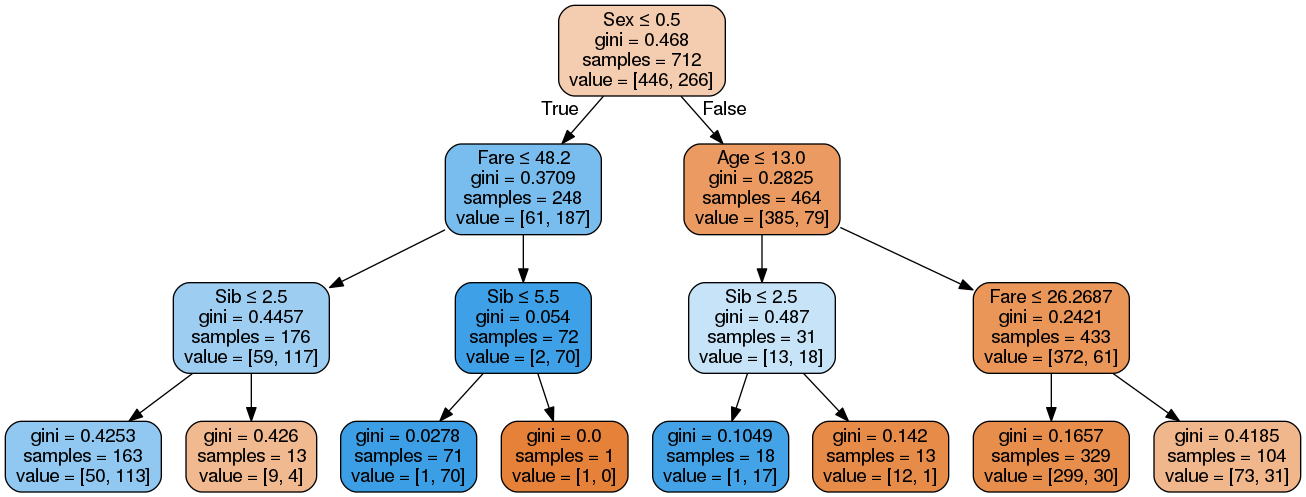

In [325]:
from IPython.display import Image  

print ("",full_X.columns.values)

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=full_X.columns.values,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [326]:
mc = sklearn.metrics.confusion_matrix(y_test, preditor)
acc = sklearn.metrics.accuracy_score(y_test, preditor)
f1 = sklearn.metrics.f1_score(y_test, preditor, average=None)#'weighted'
pr = sklearn.metrics.precision_score(y_test, preditor, average=None)
rc = sklearn.metrics.recall_score(y_test, preditor, average=None)
print("\n\nMatriz de confusão: \n", mc, "\nAccuracy\n", acc, "\nF1-Score (veja outras opções para average)\n", f1, "\nPrecision\n", pr, "\nRecall\n", rc)



Matriz de confusão: 
 [[88 15]
 [27 49]] 
Accuracy
 0.765363128492 
F1-Score (veja outras opções para average)
 [ 0.80733945  0.7       ] 
Precision
 [ 0.76521739  0.765625  ] 
Recall
 [ 0.85436893  0.64473684]


In [327]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
preditor = clf.predict(X_test)

In [328]:
mc = sklearn.metrics.confusion_matrix(y_test, preditor)
acc = sklearn.metrics.accuracy_score(y_test, preditor)
f1 = sklearn.metrics.f1_score(y_test, preditor, average=None)#'weighted'
pr = sklearn.metrics.precision_score(y_test, preditor, average=None)
rc = sklearn.metrics.recall_score(y_test, preditor, average=None)
print("\n\nMatriz de confusão: \n", mc, "\nAccuracy\n", acc, "\nF1-Score (veja outras opções para average)\n", f1, "\nPrecision\n", pr, "\nRecall\n", rc)



Matriz de confusão: 
 [[12 91]
 [ 4 72]] 
Accuracy
 0.469273743017 
F1-Score (veja outras opções para average)
 [ 0.20168067  0.60251046] 
Precision
 [ 0.75        0.44171779] 
Recall
 [ 0.11650485  0.94736842]
